In [2]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받기
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 학습 데이터 확인하기
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터 확인하기
print(x_test.shape, y_test.shape)
print(y_train)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[5 0 4 ... 5 6 8]


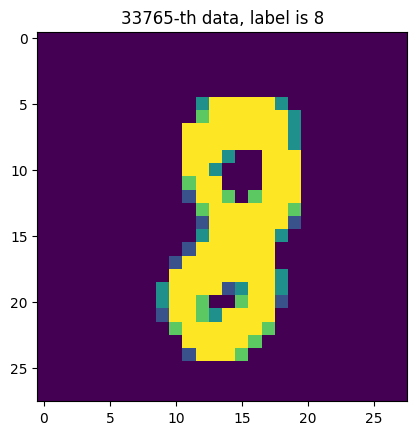

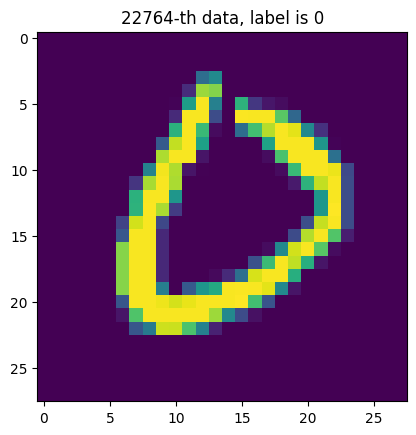

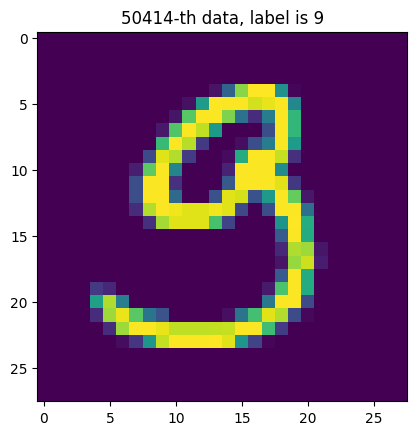

In [7]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3

# 0~59999의 범위에서 무작위로 세 개의 정수 뽑기
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx, label))

In [8]:
from sklearn.model_selection import train_test_split

# 훈련/테스트를 0.7/0.3의 비율로 분리하기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3,
                                                  random_state=777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [9]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의  입력으로 사용하기위한 전처리 과정
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


In [10]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층
model.add(Dense(64, activation='relu', input_shape = (784, )))
model.add(Dense(32, activation='relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation='softmax'))  # 10개의 출력을 가지는 신경망

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [15]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size=128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.7555 - loss: 0.8532 - val_acc: 0.9308 - val_loss: 0.2438
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9360 - loss: 0.2242 - val_acc: 0.9454 - val_loss: 0.1910
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9543 - loss: 0.1636 - val_acc: 0.9539 - val_loss: 0.1591
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9640 - loss: 0.1314 - val_acc: 0.9571 - val_loss: 0.1467
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9683 - loss: 0.1105 - val_acc: 0.9599 - val_loss: 0.1333
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9729 - loss: 0.0934 - val_acc: 0.9629 - val_loss: 0.1243
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9775 - loss: 0.0781 - val_acc: 0.9661 - val_loss: 0.1142
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9788 - loss: 0.0715 - val_acc: 0.9674 - val_loss: 0.1118
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

In [17]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

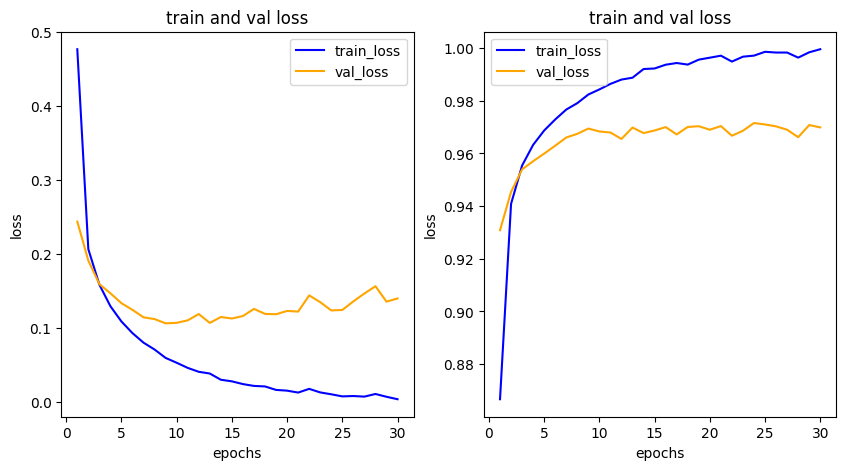

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_loss')
ax2.plot(epochs, val_acc, color='orange', label='val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9698 - loss: 0.1413


[0.12780003249645233, 0.9726999998092651]

In [22]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[2.4139373e-12 9.8094423e-12 1.6462266e-10 3.1961747e-07 5.3902472e-18
 4.2322452e-09 8.2514950e-20 9.9999958e-01 4.8998150e-10 7.8836113e-12]


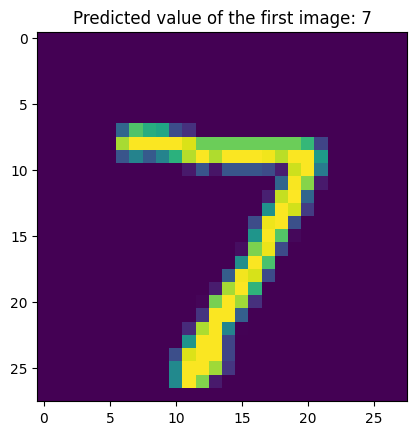

In [23]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis=-1)
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image: ' + str(arg_results[0]))
plt.show()

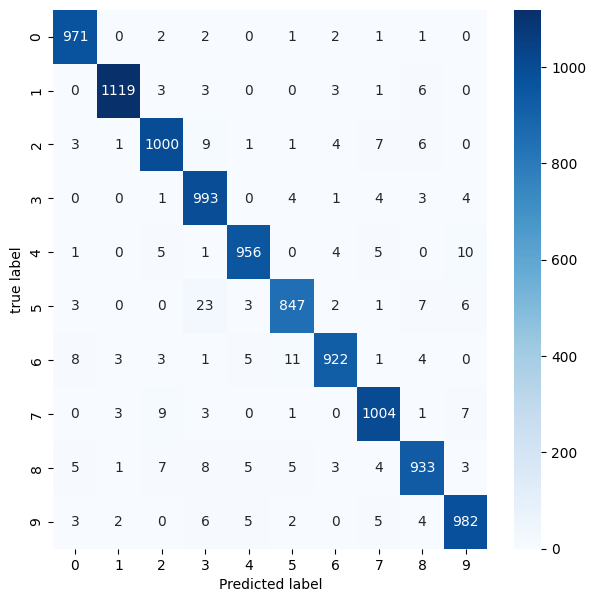

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('true label')
plt.show()

In [26]:
print('\n', classification_report(np.argmax(y_test, axis= -1), np.argmax(results, axis=-1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.95      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

